<a href="https://www.kaggle.com/code/tornikeonoprishvili/fdtd-silver-cylinder-drude-lorentz-dispersion?scriptVersionId=100472184" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!conda install -y -c conda-forge pymeep pymeep-extras seaborn

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pymeep
    - pymeep-extras
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aom-3.3.0                  |       h27087fc_1         2.6 MB  conda-forge
    autograd-1.4               |     pyhd8ed1ab_0          42 KB  conda-forge
    cached-property-1.5.2      |       hd8ed1ab_1           4 KB  conda

In [2]:
%matplotlib inline

import meep as mp
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from meep import materials as unscaled_materials


In [3]:
# scale is nanometer
nm = 1
scale_factor = nm
um = 1000 * nm

In [4]:
# Meep requires to manually change scale of materials.py
# in order to work with non-um scales.
!cp {unscaled_materials.__file__} scaled_materials.py
sed_command = f'9i um_scale = {scale_factor / um} * um_scale'
!sed -i '{sed_command}' scaled_materials.py
!head -n 12 scaled_materials.py

# -*- coding: utf-8 -*-
# Materials Library

import meep as mp
import numpy as np

# default unit length is 1 μm
um_scale = 1.0
um_scale = 0.001 * um_scale

# conversion factor for eV to 1/μm [=1/hc]
eV_um_scale = um_scale/1.23984193


Careful with the resolution!

See this diagram here (figure b), the resolution can be at most 8um/pixel

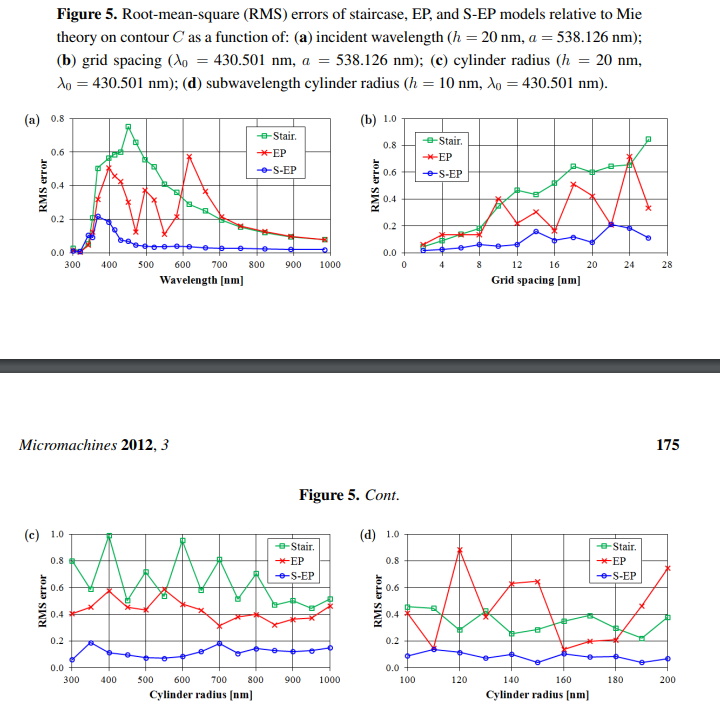

Otherwise the simulation will diverge.

In [5]:
wavelength = 430.501 # lambda_0, wavelength of source
# Currently 
# Note that usually, h can be at most 1/20 of wavelength
# Now, with plasmonic curved surfaces, it has to be even smaller 
# Otherwise the simulation will diverge
# h = 20 # DIVERGES!
h = 8  # grid spacing - doesn't diverge
# a = 1.25 * wavelength
a = 538.126 # cylinder radius
dpml = 1.0 * wavelength # pml width
s = wavelength * 5 + dpml * 2 # full grid size
resolution = 1 / h # pixels per unit of distance

In [6]:
print('pixels per wavelength',wavelength / h)
print('Usually has to be >20, but in this case has to be higher (see figure 1, b above)')
print('total size in pixels', resolution * s)

pixels per wavelength 53.812625
Usually has to be >20, but in this case has to be higher (see figure 1, b above)
total size in pixels 376.688375


-----------
Initializing structure...
time for choose_chunkdivision = 0.000396967 s
Working in 2D dimensions.
Computational cell is 3016 x 3016 x 0 with resolution 0.125
     cylinder, center = (0,0,0)
          radius 538.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.289883 s
lorentzian susceptibility: frequency=0.016365, gamma=0.00195106
lorentzian susceptibility: frequency=0.00732593, gamma=0.000738804
lorentzian susceptibility: frequency=0.00660165, gamma=5.2426e-05
lorentzian susceptibility: frequency=0.00361417, gamma=0.000364563
lorentzian susceptibility: frequency=0.000658148, gamma=0.00313427
drude susceptibility: frequency=1e-10, gamma=3.87146e-05
-----------


FloatProgress(value=0.0, description='0% done ', max=100000.0)

     cylinder, center = (0,0,0)
          radius 538.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


/opt/conda/lib/python3.7/site-packages/meep/visualization.py:413: UserWarning: No contour levels were found within the data range.
  ax.contour(eps_data, 0, levels=np.unique(eps_data), colors='black', origin='upper', extent=extent, linewidths=eps_parameters['contour_linewidth'])


Meep progress: 3292.0/100000.0 = 3.3% done in 4.0s, 117.5s to go
on time step 826 (time=3304), 0.00484541 s/step
Meep progress: 7288.0/100000.0 = 7.3% done in 8.0s, 101.8s to go
on time step 1825 (time=7300), 0.00400676 s/step
Meep progress: 11208.0/100000.0 = 11.2% done in 12.0s, 95.1s to go
on time step 2805 (time=11220), 0.00408174 s/step
Meep progress: 15124.0/100000.0 = 15.1% done in 16.0s, 89.8s to go
on time step 3784 (time=15136), 0.00408763 s/step
Meep progress: 19200.0/100000.0 = 19.2% done in 20.0s, 84.2s to go
on time step 4804 (time=19216), 0.00392662 s/step
Meep progress: 23004.0/100000.0 = 23.0% done in 24.0s, 80.4s to go
on time step 5756 (time=23024), 0.00420555 s/step
Meep progress: 26932.0/100000.0 = 26.9% done in 28.0s, 76.0s to go
on time step 6738 (time=26952), 0.00407372 s/step
Meep progress: 30800.0/100000.0 = 30.8% done in 32.0s, 71.9s to go
on time step 7705 (time=30820), 0.00413852 s/step
Meep progress: 34872.0/100000.0 = 34.9% done in 36.0s, 67.3s to go
on t

     cylinder, center = (0,0,0)
          radius 538.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

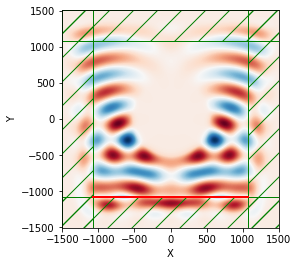

In [7]:
from scaled_materials import Ag, Au

cell_size = mp.Vector3(s,s)
boundary_layers = [mp.PML(thickness=dpml,
                          direction=mp.ALL)]

# epsilon_complex = -6.06 + 0.197j
# omega = 1/wavelength
# omega_plasma = omega * ( (( 1 - epsilon_complex.real) ** 2 + epsilon_complex.imag ** 2)
#                          / (1 - epsilon_complex.real)) ** .5
# coll_freq = omega * (epsilon_complex.imag / (1 - epsilon_complex.real))
# E_susceptibilities = [mp.DrudeSusceptibility(
#     frequency=omega_plasma,sigma=1,gamma=coll_freq)]
# material = mp.Medium(epsilon=1, 
#                      E_susceptibilities=E_susceptibilities)


geometry = [mp.Cylinder(radius=a,
                        center=mp.Vector3(0,0,0), 
                        material=Ag)]
# geometry = [
#     mp.Block(
#         size=mp.Vector3(2 * a, 2 * a, mp.inf),
#         center=mp.Vector3(0,0,0)
#     )
# ]
# beam_x0 = mp.Vector3(0,3.0)    # beam focus (relative to source center)
# rot_angle = 0  # CCW rotation angle about z axis (0: +y axis)
# beam_kdir = mp.Vector3(0,wavelength,0)\
#     .rotate(mp.Vector3(0,0,1),math.radians(rot_angle))  # beam propagation direction

sources = [
#     mp.GaussianBeamSource(
#         src=mp.ContinuousSource(wavelength=wavelength, 
#                                 width=2 * wavelength),
#         center=mp.Vector3(0, -s/2 + dpml + 1.0, 0),
#         size=mp.Vector3(s - dpml*2,0,0),
#         component=mp.Ez,
#         beam_x0=mp.Vector3(0, s/4),
#         beam_kdir=mp.Vector3(0,1,0),
#         beam_w0=s/2,
#         beam_E0=mp.Vector3(0,0,1)
#         eig_kpoint=beam_kdir,
#     )
    mp.Source(
        src=mp.ContinuousSource(wavelength=wavelength, 
                                width=2 * wavelength),
        center=mp.Vector3(0, -s/2 + dpml + 1.0, 0),
        size=mp.Vector3(s - dpml*2,0,0),
        component=mp.Ez,
    )
]


sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=boundary_layers,
                    geometry=geometry,
#                     k_point=beam_kdir,
                    sources=sources,
                   )

f = plt.figure(figsize = (8,8))
animation = mp.Animate2D(sim, mp.Ez, f=f, eps_parameters=dict(contour=True))

plt.close()
t_steps = 100000
fps = 4
anim_seconds = 10
anim_frames = anim_seconds * fps
sim.run(
    mp.at_every(t_steps / anim_frames, animation),
    until=t_steps
)

animation.to_mp4(fps, 'animation.mp4')

sim.plot2D(fields=mp.Ez)

# plt.savefig('Ez_angle{}.png'.format(rot_angle),bbox_inches='tight',pad_inches=0)

In [8]:
from IPython.display import Video
Video('animation.mp4')